In [202]:
import numpy as np
import src.afqmc as afqmc
import importlib
import matplotlib.pyplot as plt


importlib.reload(afqmc)
from src.afqmc import *

In [203]:
def get_SzSz(p, n_stab, n_mc, n_thermal):
    SzSz = np.zeros((p["N"], p["N"]))
    afqmc = AFQMC(**p)
    for i_mc in range(n_mc):
        print("beta:", p["beta"], "i_mc:", i_mc)
        for l in reversed(range(p["L"])):
            if l % n_stab == 0:
                afqmc.stabilize(l)
            afqmc.i_sweep(l)
            afqmc.time_update_green_function(l)
        if i_mc > n_thermal:
            SzSz += np.array(
                [
                    [afqmc.make_SzSz_2d(i, j) for i in range(p["N"])]
                    for j in range(p["N"])
                ]
            )
    SzSz /= n_mc - n_thermal - 1
    return SzSz

In [205]:
p = {}
p["N"] = 10
p["L"] = None
p["beta"] = None
p["t"] = 1.0
p["U"] = 4
p["mu"] = p["U"] / 2
p["dimension"] = 2
p["random_seed"] = 0

In [206]:
SzSz_beta = []
for beta in range(6):
    p["beta"] = beta
    p["L"] = 20
    print(p["L"])
    SzSz = get_SzSz(p, n_stab=1, n_mc=10, n_thermal=3)
    SzSz_beta.append(SzSz)

20
beta: 0 i_mc: 0
beta: 0 i_mc: 1
beta: 0 i_mc: 2
beta: 0 i_mc: 3
beta: 0 i_mc: 4
beta: 0 i_mc: 5
beta: 0 i_mc: 6
beta: 0 i_mc: 7
beta: 0 i_mc: 8
beta: 0 i_mc: 9
20
beta: 1 i_mc: 0
beta: 1 i_mc: 1
beta: 1 i_mc: 2
beta: 1 i_mc: 3
beta: 1 i_mc: 4
beta: 1 i_mc: 5
beta: 1 i_mc: 6
beta: 1 i_mc: 7
beta: 1 i_mc: 8
beta: 1 i_mc: 9
20
beta: 2 i_mc: 0
beta: 2 i_mc: 1
beta: 2 i_mc: 2
beta: 2 i_mc: 3
beta: 2 i_mc: 4
beta: 2 i_mc: 5
beta: 2 i_mc: 6
beta: 2 i_mc: 7
beta: 2 i_mc: 8
beta: 2 i_mc: 9
20
beta: 3 i_mc: 0
beta: 3 i_mc: 1
beta: 3 i_mc: 2
beta: 3 i_mc: 3
beta: 3 i_mc: 4
beta: 3 i_mc: 5
beta: 3 i_mc: 6
beta: 3 i_mc: 7
beta: 3 i_mc: 8
beta: 3 i_mc: 9
20
beta: 4 i_mc: 0
beta: 4 i_mc: 1
beta: 4 i_mc: 2
beta: 4 i_mc: 3
beta: 4 i_mc: 4
beta: 4 i_mc: 5
beta: 4 i_mc: 6
beta: 4 i_mc: 7
beta: 4 i_mc: 8
beta: 4 i_mc: 9
20
beta: 5 i_mc: 0
beta: 5 i_mc: 1
beta: 5 i_mc: 2
beta: 5 i_mc: 3
beta: 5 i_mc: 4
beta: 5 i_mc: 5
beta: 5 i_mc: 6
beta: 5 i_mc: 7
beta: 5 i_mc: 8
beta: 5 i_mc: 9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


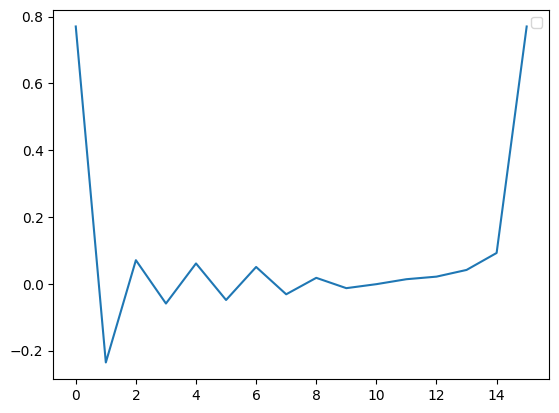

In [207]:
SzSz_on_path = (
    [SzSz_beta[5][x, 0] for x in range(6)]
    + [SzSz_beta[5][5, y] for y in range(1, 6)]
    + [SzSz_beta[5][xy, xy] for xy in reversed(range(5))]
)
fig, ax = plt.subplots()
ax.plot(SzSz_on_path)
ax.legend()

In [218]:
N = p["N"]
k_path = (
    [(np.pi * ikx / N, 0) for ikx in range(N)]
    + [(np.pi, np.pi * ikx / N) for ikx in range(N)]
    + [(np.pi * ikxy / N, np.pi * ikxy / N) for ikxy in reversed(range(N))]
)

SzSz_k_on_path = [r2k(SzSz_beta[5], kx, ky) for kx, ky in k_path]

In [220]:
k_path

[(0.0, 0),
 (0.3141592653589793, 0),
 (0.6283185307179586, 0),
 (0.9424777960769379, 0),
 (1.2566370614359172, 0),
 (1.5707963267948966, 0),
 (1.8849555921538759, 0),
 (2.199114857512855, 0),
 (2.5132741228718345, 0),
 (2.827433388230814, 0),
 (3.141592653589793, 0.0),
 (3.141592653589793, 0.3141592653589793),
 (3.141592653589793, 0.6283185307179586),
 (3.141592653589793, 0.9424777960769379),
 (3.141592653589793, 1.2566370614359172),
 (3.141592653589793, 1.5707963267948966),
 (3.141592653589793, 1.8849555921538759),
 (3.141592653589793, 2.199114857512855),
 (3.141592653589793, 2.5132741228718345),
 (3.141592653589793, 2.827433388230814),
 (2.827433388230814, 2.827433388230814),
 (2.5132741228718345, 2.5132741228718345),
 (2.199114857512855, 2.199114857512855),
 (1.8849555921538759, 1.8849555921538759),
 (1.5707963267948966, 1.5707963267948966),
 (1.2566370614359172, 1.2566370614359172),
 (0.9424777960769379, 0.9424777960769379),
 (0.6283185307179586, 0.6283185307179586),
 (0.3141592653

In [221]:
SzSz_k_on_path

[(0.13285806387644084+0j),
 (0.49008284329081897-0.13481569084499145j),
 (0.24255635068783543+6.245004513516506e-17j),
 (0.49008284329081875-0.31269089565827796j),
 (0.5043459931656329+1.3877787807814457e-17j),
 (0.4900828432908186-0.22930774776237056j),
 (0.6058556248472866-9.71445146547012e-17j),
 (0.49008284329081847-0.14697460611173768j),
 (0.6483921533437783-2.0816681711721685e-17j),
 (0.49008284329081886-0.10762192272148494j),
 (0.7656701249426812-1.6874854118033675e-16j),
 (1.671066418448422-0.15052672864904312j),
 (0.7353604066398739-6.938893903907228e-18j),
 (1.671066418448422-0.5814219257721548j),
 (0.8228345395422934-2.7755575615628914e-16j),
 (1.671066418448421-1.1886210140351394j),
 (1.2592396237130663-2.0816681711721685e-16j),
 (1.671066418448421-1.9782022128588694j),
 (2.827984601332603-1.0547118733938987e-15j),
 (1.6710664184484216-1.5085000814964824j),
 (-0.14317929690554265-0.6579092716415281j),
 (1.6069665764812686-6.106226635438361e-16j),
 (0.06121528014762889-0.864

/root/.pyenv/versions/3.11.5/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


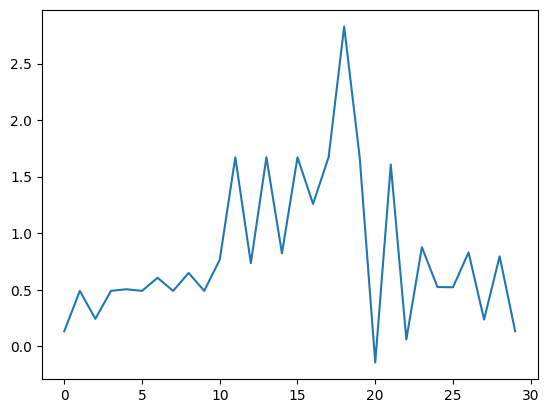

In [222]:
fig, ax = plt.subplots()
ax.plot(SzSz_k_on_path)

In [208]:
SzSz_beta_pipi = [np.real(r2k(SzSz_beta[beta], np.pi, np.pi)) for beta in range(6)]

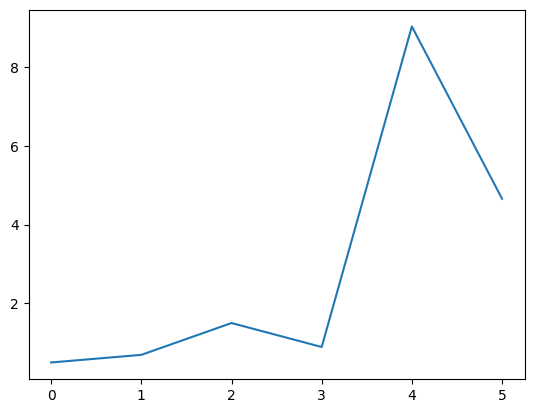

In [210]:
fig, ax = plt.subplots()
ax.plot(SzSz_beta_pipi)